# 1. Exploratory Data Analysis

### Dataset preparation

#### Importing nessesary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

#### Loading dataset:

In [2]:
data = pd.read_csv(r'./data/bank-additional-full.csv', delimiter = ';')

#### Converting string target variable to binary labels:

In [3]:
data['y'] = data['y'].map({'no': 0, 'yes':1})              

### First look at the data

#### Read the data:

In [4]:
print(f'Dataset has {data.shape[0]} rows and {data.shape[1]} columns.')
data.head()

Dataset has 41188 rows and 21 columns.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#### Look at the types of the variables in dataset:

In [5]:
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Check data for null values:

In [6]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Look at some statistical data of the numerical values of the dataset:

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### Analysis of the variables in the data

##### Variable: y - target value (numeric):

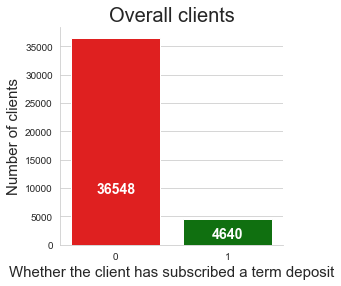

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Overall clients', fontsize = 20)
ax.set_xlabel('Whether the client has subscribed a term deposit', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
labels = (data['y'].value_counts())
for i, v in enumerate(labels):
    ax.text(i, v / 4, str(v), horizontalalignment = 'center', size = 14, color = 'white', fontweight = 'bold')
sns.despine()

##### Check proporion of the target variable:

In [9]:
data['y'].value_counts(normalize = True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [10]:
y_counts = data['y'].value_counts()
print('This is an imbalanced dataset and the ratio of class 1 to  class 0  instances is:  1:' + str(round(y_counts[0] / y_counts[1], 2)))

This is an imbalanced dataset and the ratio of class 1 to  class 0  instances is:  1:7.88


##### Variable: age (numeric):

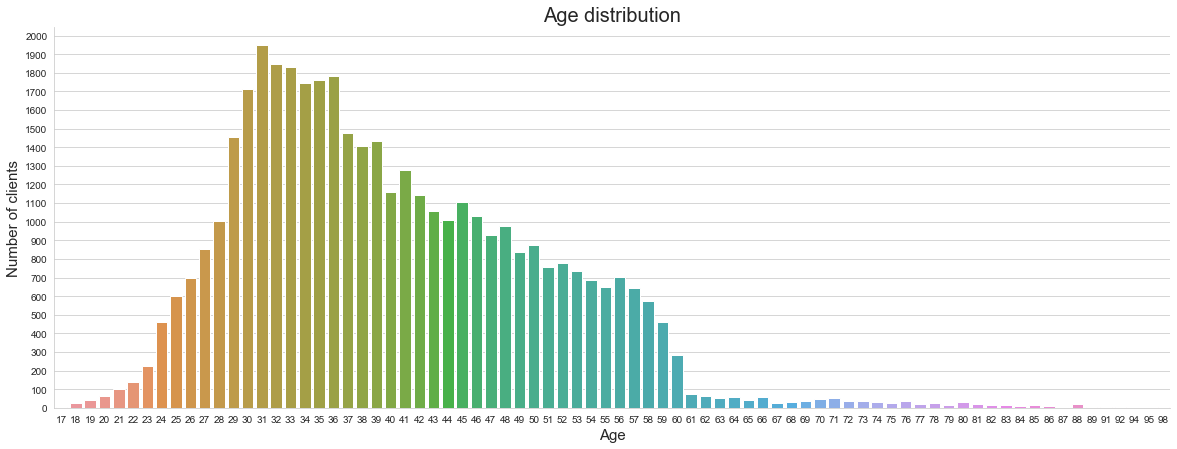

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
sns.countplot(x = 'age', data = data)
ax.set_title('Age distribution', fontsize = 20)
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_yticks(np.arange(0, 2100, step = 100))
sns.despine()

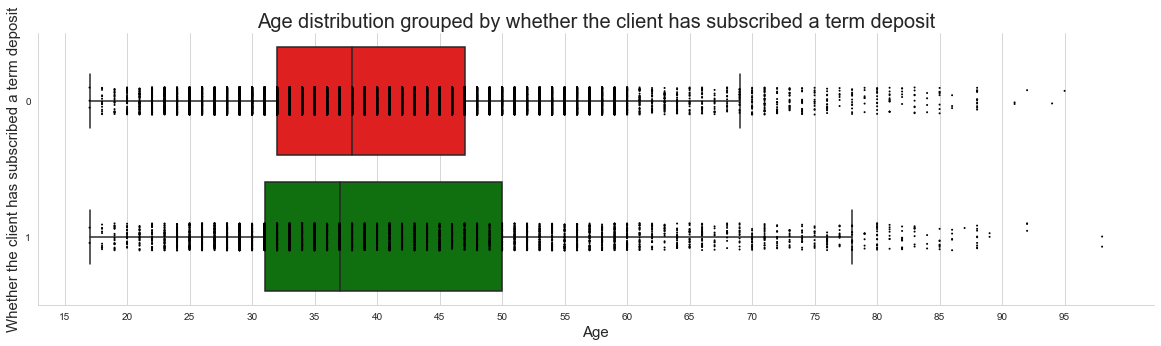

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.boxplot(y = 'y', x = 'age', data = data, palette = ['red', 'green'], orient = 'h', fliersize = 0),
sns.stripplot(y = 'y', x = 'age', data = data, palette = ['black', 'black'], orient = 'h', size = 2)
ax.set_title('Age distribution grouped by whether the client has subscribed a term deposit',fontsize = 20)
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Whether the client has subscribed a term deposit', fontsize = 15)
ax.set_xticks(np.arange(15, 100, step = 5))
ax.set_yticks( np.arange(2), ['0', '1'])
sns.despine()

In [13]:
data.pivot_table(values = 'y', index = 'age',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,age,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,91,92,94,95,98
sum,y,2.000000,12.000000,20.000000,23.000000,29.000000,36.000000,48.000000,86.000000,93.000000,122.000000,114.000000,151.000000,186.000000,202.000000,220.000000,184.000000,210.000000,184.000000,167.000000,154.000000,137.000000,143.000000,114.000000,84.000000,113.000000,91.000000,88.000000,77.000000,92.000000,79.000000,58.000000,97.000000,55.000000,87.000000,72.000000,81.000000,68.000000,64.000000,56.000000,80.000000,62.000000,58.000000,69.000000,58.000000,32.000000,25.000000,17.000000,27.000000,23.000000,29.000000,11.000000,15.000000,14.000000,19.000000,21.000000,13.000000,13.000000,15.000000,11.000000,18.000000,13.000000,14.000000,7.000000,18.000000,8.000000,11.000000,8.000000,3.000000,7.000000,5.000000,1.000000,9.000000,2.000000,0.000000,3.000000,0.000000,0.000000,2.000000
count,y,5.000000,28.000000,42.000000,65.000000,102.000000,137.000000,226.000000,463.000000,598.000000,698.000000,851.000000,1001.000000,1453.000000,1714.000000,1947.000000,1846.000000,1833.000000,1745.000000,1759.000000,1780.000000,1475.000000,1407.000000,1432.000000,1161.000000,1278.000000,1142.000000,1055.000000,1011.000000,1103.000000,1030.000000,928.000000,979.000000,839.000000,875.000000,754.000000,779.000000,733.000000,684.000000,648.000000,704.000000,646.000000,576.000000,463.000000,283.000000,73.000000,62.000000,55.000000,57.000000,44.000000,57.000000,26.000000,33.000000,34.000000,47.000000,53.000000,34.000000,34.000000,32.000000,24.000000,34.000000,20.000000,27.000000,14.000000,31.000000,20.000000,17.000000,17.000000,7.000000,15.000000,8.000000,1.000000,22.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000
mean,y,0.400000,0.428571,0.476190,0.353846,0.284314,0.262774,0.212389,0.185745,0.155518,0.174785,0.133960,0.150849,0.128011,0.117853,0.112994,0.099675,0.114566,0.105444,0.094940,0.086517,0.092881,0.101635,0.079609,0.072351,0.088419,0.079685,0.083412,0.076162,0.083409,0.076699,0.062500,0.099081,0.065554,0.099429,0.095491,0.103979,0.092769,0.093567,0.086420,0.113636,0.095975,0.100694,0.149028,0.204947,0.438356,0.403226,0.309091,0.473684,0.522727,0.508772,0.423077,0.454545,0.411765,0.404255,0.396226,0.382353,0.382353,0.468750,0.458333,0.529412,0.650000,0.518519,0.500000,0.580645,0.400000,0.647059,0.470588,0.428571,0.466667,0.625000,1.000000,0.409091,1.000000,0.000000,0.750000,0.000000,0.000000,1.000000


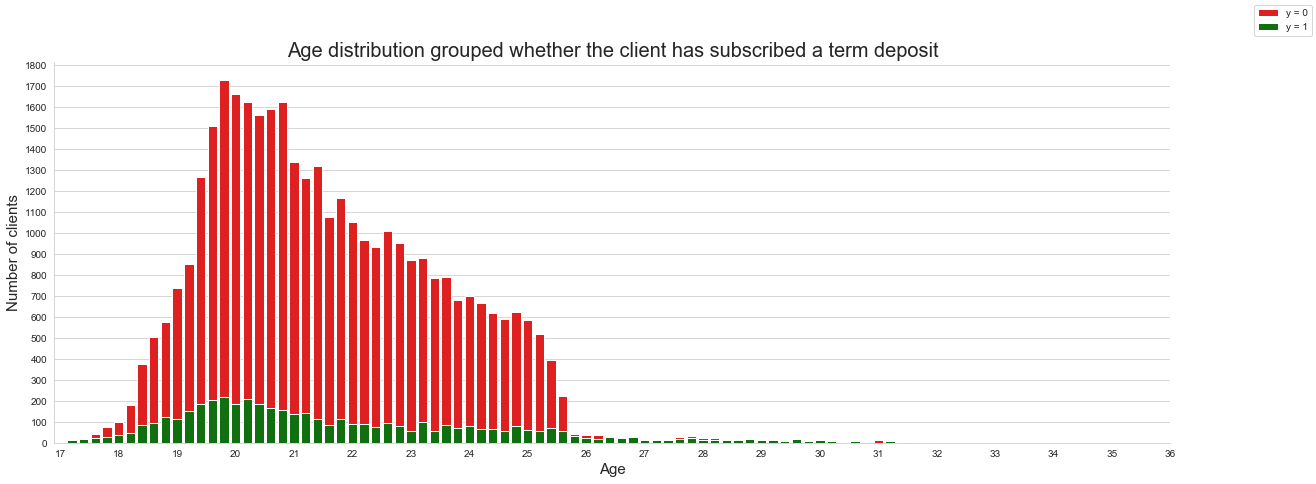

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
sns.countplot(data[data['y'] == 0]['age'], color = 'red', label = 'y = 0')
sns.countplot(data[data['y'] == 1]['age'], color = 'green', label = 'y = 1')
ax.set_title('Age distribution grouped whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_xticks(np.arange(0, 100, step = 5))
ax.set_yticks(np.arange(0, 1900, step = 100))
fig.legend()
sns.despine()

##### Vriable: job (categorical):

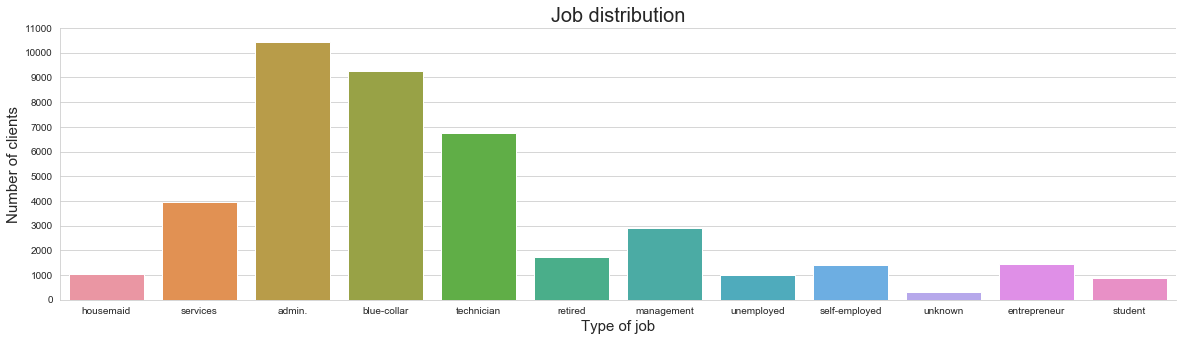

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'job', data = data)
ax.set_title('Job distribution', fontsize = 20)
ax.set_xlabel('Type of job', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_yticks(np.arange(0, 12000, step = 1000))
sns.despine()

In [16]:
data.pivot_table(values = 'y', index = 'job',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
sum,y,1352.000000,638.000000,124.000000,106.000000,328.000000,434.000000,149.000000,323.000000,275.000000,730.000000,144.000000,37.000000
count,y,10422.000000,9254.000000,1456.000000,1060.000000,2924.000000,1720.000000,1421.000000,3969.000000,875.000000,6743.000000,1014.000000,330.000000
mean,y,0.129726,0.068943,0.085165,0.100000,0.112175,0.252326,0.104856,0.081381,0.314286,0.108260,0.142012,0.112121


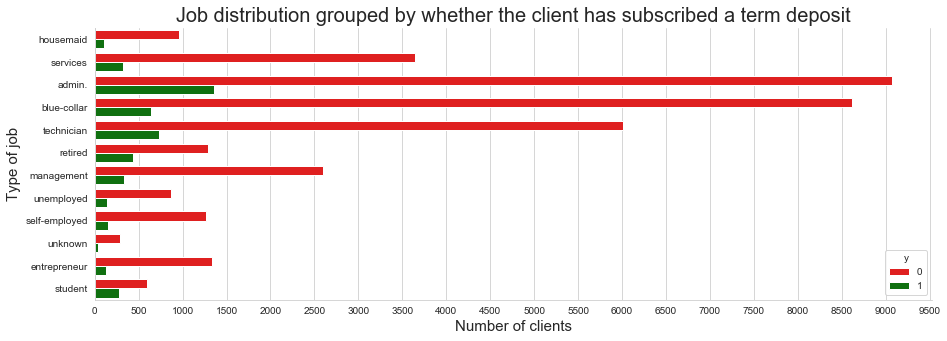

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(y = 'job', hue = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Job distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Type of job', fontsize = 15)
ax.set_xticks(np.arange(0, 10000, step = 500))
sns.despine()

##### Variable: marital (categorical):

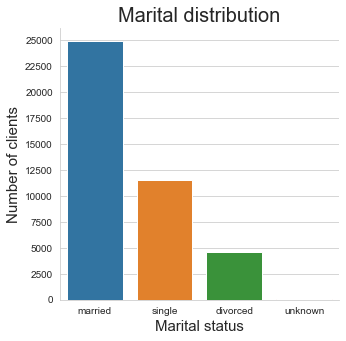

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.countplot(x = 'marital', data = data)
ax.set_title('Marital distribution', fontsize = 20)
ax.set_xlabel('Marital status', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_yticks(np.arange(0, 26000, step = 2500))
sns.despine()

In [19]:
data.pivot_table(values = 'y', index = 'marital',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,marital,divorced,married,single,unknown
sum,y,476.000000,2532.000000,1620.000000,12.000000
count,y,4612.000000,24928.000000,11568.000000,80.000000
mean,y,0.103209,0.101573,0.140041,0.150000


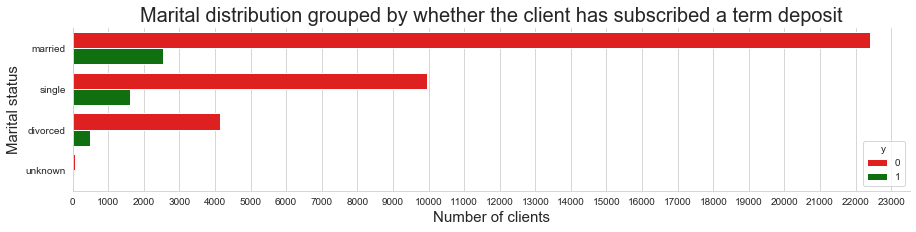

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 3)
sns.countplot(y = 'marital', hue = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Marital distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Marital status', fontsize = 15)
ax.set_xticks(np.arange(0, 24000, step = 1000))
sns.despine()

##### Variable: education (caterogical):

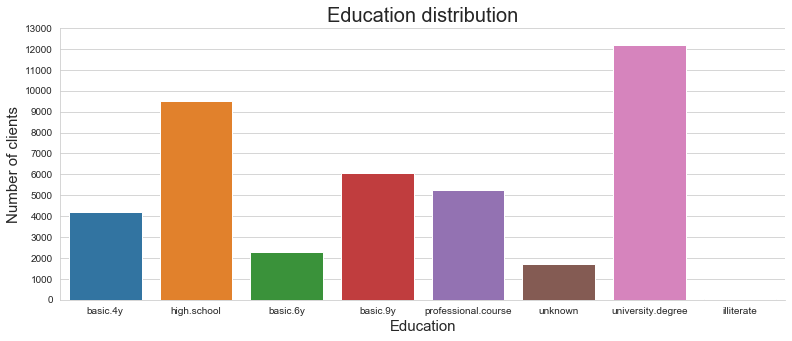

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 5)
sns.countplot(x = 'education', data = data)
ax.set_title('Education distribution', fontsize = 20)
ax.set_xlabel('Education', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_yticks(np.arange(0, 14000, step = 1000))
sns.despine()

In [22]:
data.pivot_table(values = 'y', index = 'education',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
sum,y,428.000000,188.000000,473.000000,1031.000000,4.000000,595.000000,1670.000000,251.000000
count,y,4176.000000,2292.000000,6045.000000,9515.000000,18.000000,5243.000000,12168.000000,1731.000000
mean,y,0.102490,0.082024,0.078246,0.108355,0.222222,0.113485,0.137245,0.145003


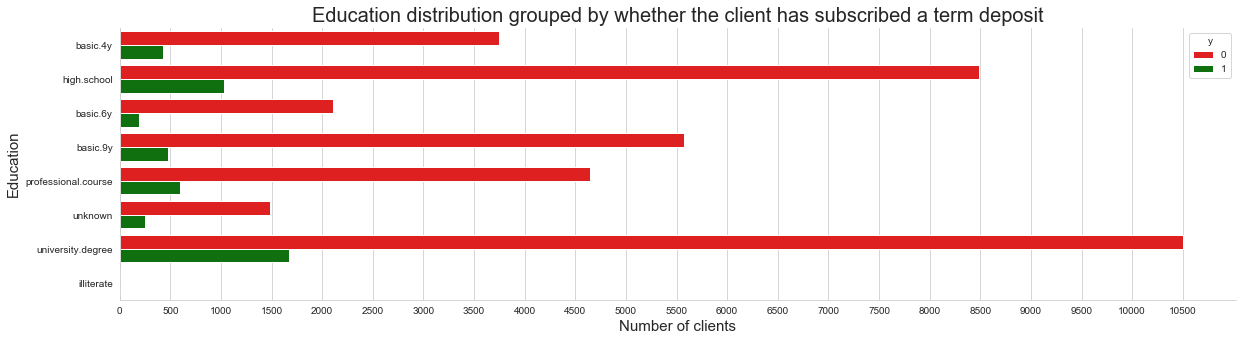

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(y = 'education', hue = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Education distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Education', fontsize = 15)
ax.set_xticks(np.arange(0, 11000, step = 500))
sns.despine()

##### Variable: default (categorical):

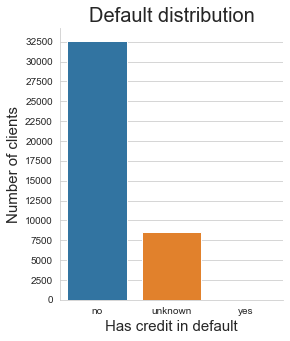

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 5)
sns.countplot(x = 'default', data = data)
ax.set_title('Default distribution', fontsize = 20)
ax.set_xlabel('Has credit in default', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_yticks(np.arange(0, 35000, step = 2500))
sns.despine()

In [25]:
data.pivot_table(values = 'y', index = 'default',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,default,no,unknown,yes
sum,y,4197.000000,443.000000,0.000000
count,y,32588.000000,8597.000000,3.000000
mean,y,0.128790,0.051530,0.000000


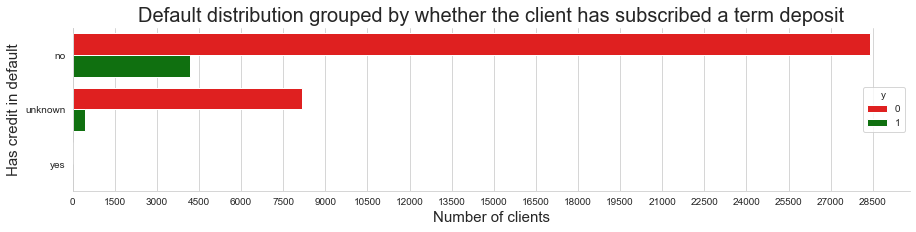

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 3)
sns.countplot(y = 'default', hue = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Default distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Has credit in default', fontsize = 15)
ax.set_xticks(np.arange(0, 30000, step = 1500))
sns.despine()

##### Variable: housing (categorical):

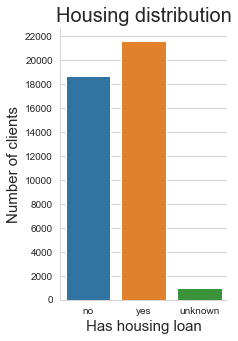

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.countplot(x = 'housing', data = data)
ax.set_title('Housing distribution', fontsize = 20)
ax.set_xlabel('Has housing loan', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_yticks(np.arange(0, 24000, step = 2000))
sns.despine()

In [28]:
data.pivot_table(values = 'y', index = 'housing',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,housing,no,unknown,yes
sum,y,2026.000000,107.000000,2507.000000
count,y,18622.000000,990.000000,21576.000000
mean,y,0.108796,0.108081,0.116194


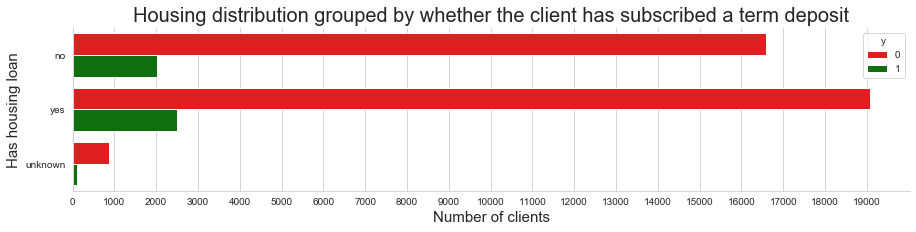

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 3)
sns.countplot(y = 'housing', hue='y', data = data, palette = ['red', 'green'])
ax.set_title('Housing distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Has housing loan', fontsize = 15)
ax.set_xticks(np.arange(0, 20000, step = 1000))
sns.despine()

##### Variable: loan (categorical):

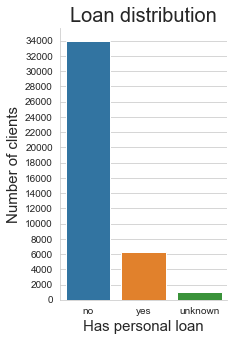

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.countplot(x = 'loan', data = data)
ax.set_title('Loan distribution', fontsize = 20)
ax.set_xlabel('Has personal loan', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_yticks(np.arange(0, 36000, step = 2000))
sns.despine()

In [31]:
data.pivot_table(values = 'y', index = 'loan',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,loan,no,unknown,yes
sum,y,3850.000000,107.000000,683.000000
count,y,33950.000000,990.000000,6248.000000
mean,y,0.113402,0.108081,0.109315


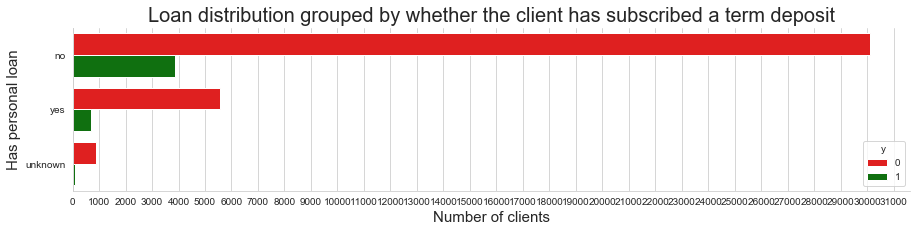

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 3)
sns.countplot(y = 'loan', hue = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Loan distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Has personal loan', fontsize = 15)
ax.set_xticks(np.arange(0, 32000, step = 1000))
sns.despine()

##### Variable: contact (categorical):

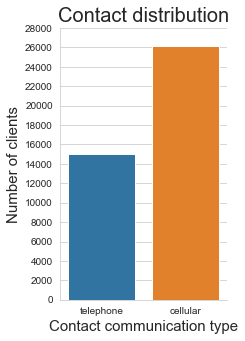

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
sns.countplot(x = 'contact', data = data)
ax.set_title('Contact distribution', fontsize = 20)
ax.set_xlabel('Contact communication type', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_yticks(np.arange(0, 29000, step = 2000))
sns.despine()

In [34]:
data.pivot_table(values = 'y', index = 'contact',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,contact,cellular,telephone
sum,y,3853.000000,787.000000
count,y,26144.000000,15044.000000
mean,y,0.147376,0.052313


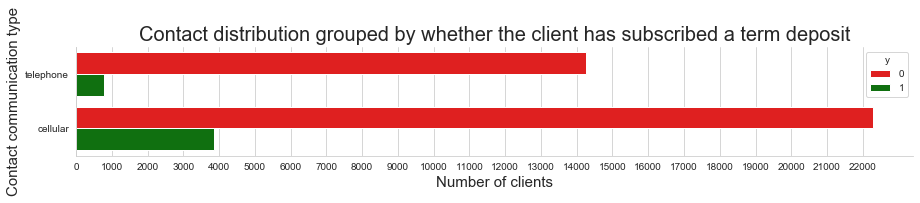

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 2)
sns.countplot(y = 'contact', hue = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Contact distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Contact communication type', fontsize = 15)
ax.set_xticks(np.arange(0, 23000, step = 1000))
sns.despine()

##### Variable: month (categorical):

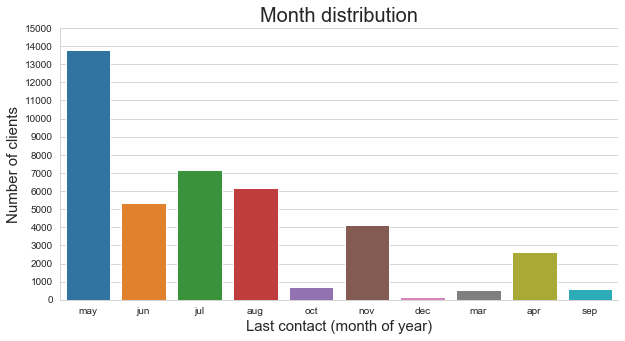

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'month', data = data)
ax.set_title('Month distribution', fontsize = 20)
ax.set_xlabel('Last contact (month of year)', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_yticks(np.arange(0, 16000, step = 1000))
sns.despine()

In [37]:
data.pivot_table(values = 'y', index = 'month',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
sum,y,539.000000,655.000000,89.000000,649.000000,559.000000,276.000000,886.000000,416.000000,315.000000,256.000000
count,y,2632.000000,6178.000000,182.000000,7174.000000,5318.000000,546.000000,13769.000000,4101.000000,718.000000,570.000000
mean,y,0.204787,0.106021,0.489011,0.090466,0.105115,0.505495,0.064347,0.101439,0.438719,0.449123


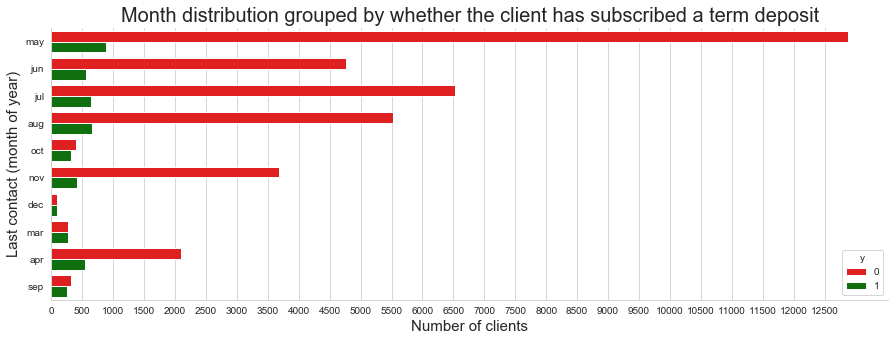

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(y = 'month', hue = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Month distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Last contact (month of year)', fontsize = 15)
ax.set_xticks(np.arange(0, 13000, step = 500))
sns.despine()

##### Variabie: day of week (categorical):

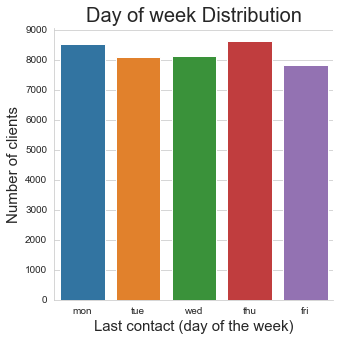

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.countplot(x = 'day_of_week', data = data)
ax.set_title('Day of week Distribution', fontsize = 20)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_xlabel('Last contact (day of the week)', fontsize = 15)
ax.set_yticks(np.arange(0, 10000, step = 1000))
sns.despine()

In [40]:
data.pivot_table(values = 'y', index = 'day_of_week',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,day_of_week,fri,mon,thu,tue,wed
sum,y,846.000000,847.000000,1045.000000,953.000000,949.000000
count,y,7827.000000,8514.000000,8623.000000,8090.000000,8134.000000
mean,y,0.108087,0.099483,0.121188,0.117800,0.116671


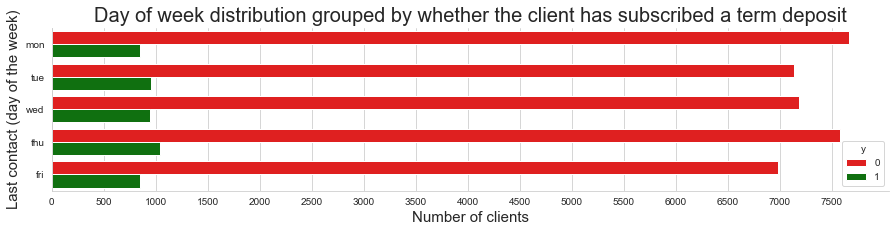

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 3)
sns.countplot(y = 'day_of_week', hue = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Day of week distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Last contact (day of the week)', fontsize = 15)
ax.set_xticks(np.arange(0, 8000, step = 500))
sns.despine()

##### Variable: duration (numeric):

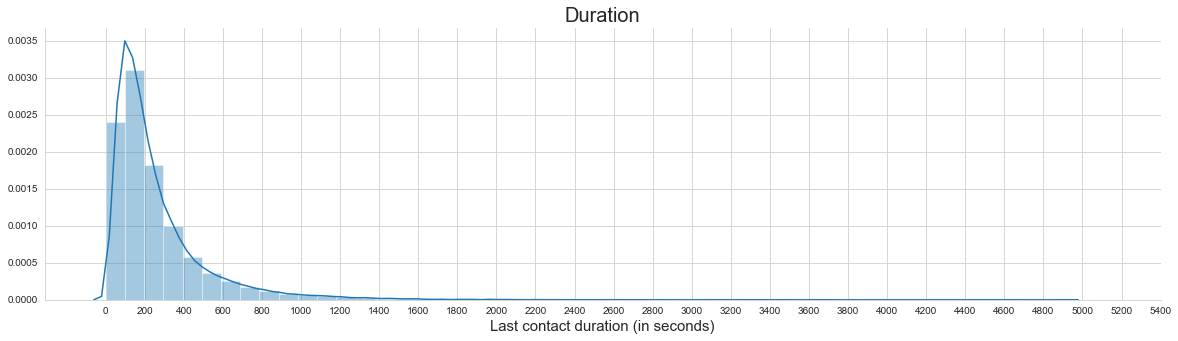

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.distplot(data['duration'])
#ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_title('Duration', fontsize = 20)
ax.set_xlabel('Last contact duration (in seconds)', fontsize = 15)
ax.set_xticks(np.arange(0, 5500, step = 200))
sns.despine()

In [43]:
data.pivot_table(values = 'y', index = 'duration',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

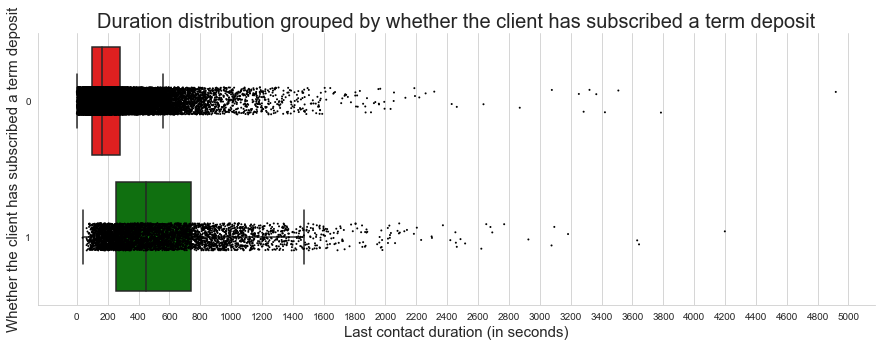

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.boxplot(y = 'y', x = 'duration', data = data, palette = ['red', 'green'], orient = 'h', fliersize = 0),
sns.stripplot(y = 'y', x = 'duration', data = data, palette = ['black', 'black'], orient = 'h', size = 2)
ax.set_title('Duration distribution grouped by whether the client has subscribed a term deposit',fontsize = 20)
ax.set_xlabel('Last contact duration (in seconds)', fontsize = 15)
ax.set_ylabel('Whether the client has subscribed a term deposit', fontsize = 15)
ax.set_xticks(np.arange(0, 5200, step = 200))
ax.set_yticks( np.arange(2), ['0', '1'])
sns.despine()

##### Variable: campaign (numeric):

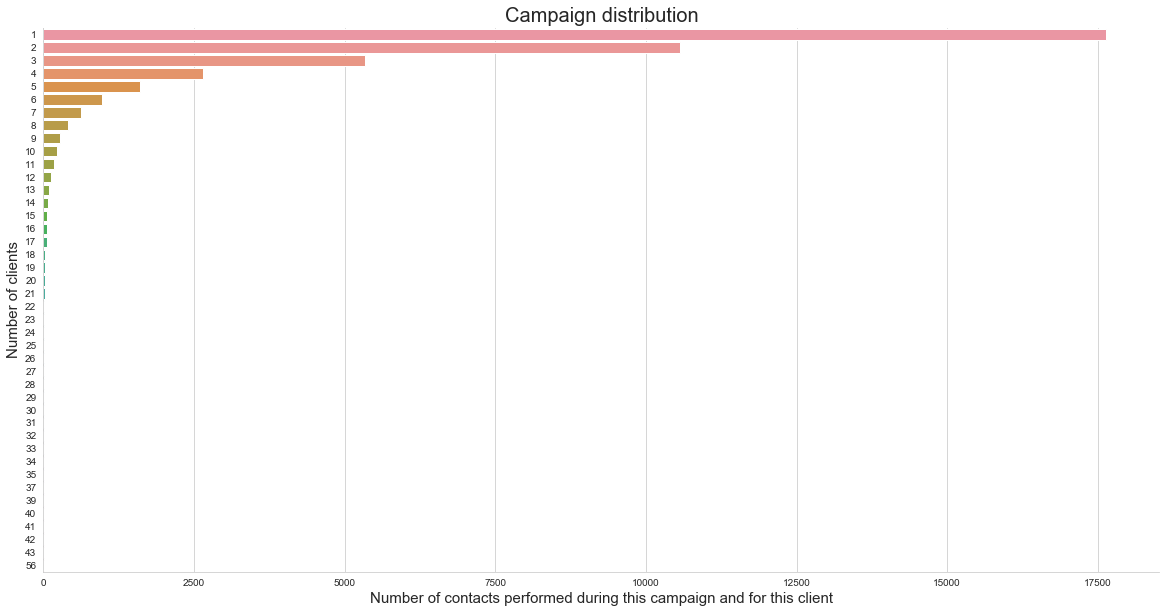

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(y = 'campaign', data = data)
ax.set_title('Campaign distribution', fontsize = 20)
ax.set_xlabel('Number of contacts performed during this campaign and for this client', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
sns.despine()

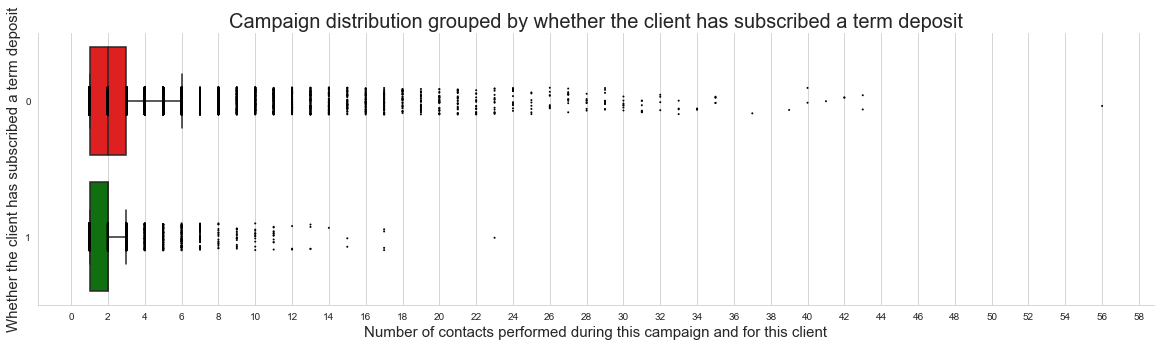

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.boxplot(y = 'y', x = 'campaign', data = data, palette = ['red', 'green'], orient = 'h', fliersize = 0),
sns.stripplot(y = 'y', x = 'campaign', data = data, palette = ['black', 'black'], orient = 'h', size = 2)
ax.set_title('Campaign distribution grouped by whether the client has subscribed a term deposit',fontsize = 20)
ax.set_xlabel('Number of contacts performed during this campaign and for this client', fontsize = 15)
ax.set_ylabel('Whether the client has subscribed a term deposit', fontsize = 15)
ax.set_xticks(np.arange(0, 60, step = 2))
ax.set_yticks( np.arange(2), ['0', '1'])
sns.despine()

In [47]:
data.pivot_table(values = 'y', index = 'campaign',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,campaign,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,39,40,41,42,43,56
sum,y,2300.000000,1211.000000,574.000000,249.000000,120.000000,75.000000,38.000000,17.000000,17.000000,12.000000,12.000000,3.000000,4.000000,1.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
count,y,17642.000000,10570.000000,5341.000000,2651.000000,1599.000000,979.000000,629.000000,400.000000,283.000000,225.000000,177.000000,125.000000,92.000000,69.000000,51.000000,51.000000,58.000000,33.000000,26.000000,30.000000,24.000000,17.000000,16.000000,15.000000,8.000000,8.000000,11.000000,8.000000,10.000000,7.000000,7.000000,4.000000,4.000000,3.000000,5.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
mean,y,0.130371,0.114570,0.107471,0.093927,0.075047,0.076609,0.060413,0.042500,0.060071,0.053333,0.067797,0.024000,0.043478,0.014493,0.039216,0.000000,0.068966,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


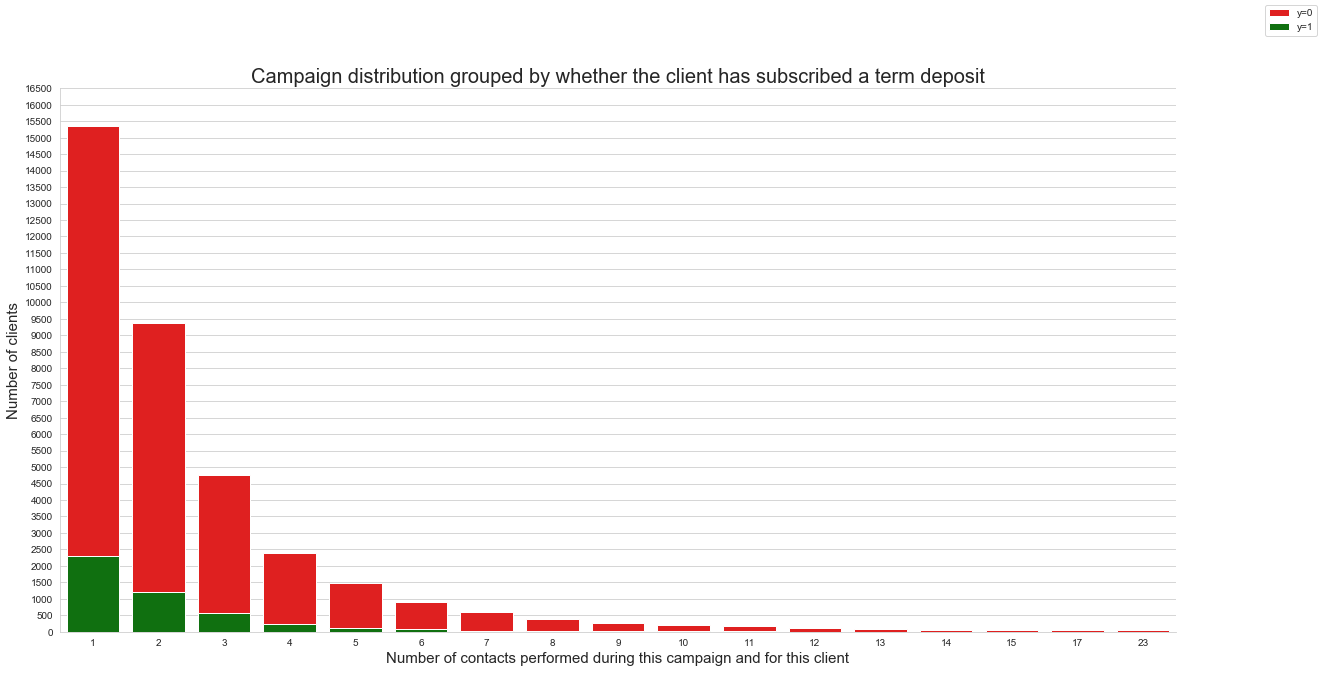

In [48]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.countplot(data[data['y'] == 0]['campaign'], color='red', label = 'y=0')
sns.countplot(data[data['y'] == 1]['campaign'], color='green', label = 'y=1')
ax.set_title('Campaign distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of contacts performed during this campaign and for this client', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_yticks(np.arange(0, 17000, step = 500))
fig.legend()
sns.despine()

##### Variable: pdays (numeric):

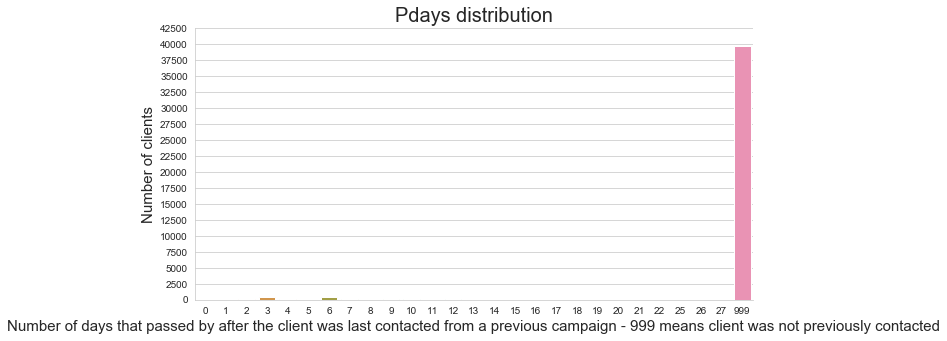

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'pdays', data = data)
ax.set_title('Pdays distribution', fontsize = 20)
ax.set_xlabel('Number of days that passed by after the client was last contacted from a previous campaign - 999 means client was not previously contacted', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_yticks(np.arange(0, 45000, step = 2500))
sns.despine()

In [50]:
data.pivot_table(values = 'y', index='pdays',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,pdays,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,26,27,999
sum,y,10.000000,8.000000,37.000000,298.000000,63.000000,29.000000,289.000000,40.000000,12.000000,35.000000,30.000000,15.000000,26.000000,28.000000,11.000000,16.000000,6.000000,2.000000,4.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3673.000000
count,y,15.000000,26.000000,61.000000,439.000000,118.000000,46.000000,412.000000,60.000000,18.000000,64.000000,52.000000,28.000000,58.000000,36.000000,20.000000,24.000000,11.000000,8.000000,7.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,39673.000000
mean,y,0.666667,0.307692,0.606557,0.678815,0.533898,0.630435,0.701456,0.666667,0.666667,0.546875,0.576923,0.535714,0.448276,0.777778,0.550000,0.666667,0.545455,0.250000,0.571429,0.333333,0.000000,1.000000,0.666667,1.000000,1.000000,1.000000,0.092582


##### Variable: previous (numeric):

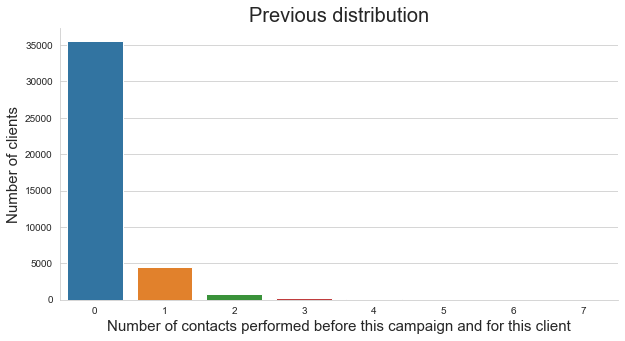

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'previous', data = data)
ax.set_title('Previous distribution', fontsize = 20)
ax.set_xlabel('Number of contacts performed before this campaign and for this client', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
sns.despine()

In [52]:
data.pivot_table(values = 'y', index='previous',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,previous,0,1,2,3,4,5,6,7
sum,y,3141.000000,967.000000,350.000000,128.000000,38.000000,13.000000,3.000000,0.000000
count,y,35563.000000,4561.000000,754.000000,216.000000,70.000000,18.000000,5.000000,1.000000
mean,y,0.088322,0.212015,0.464191,0.592593,0.542857,0.722222,0.600000,0.000000


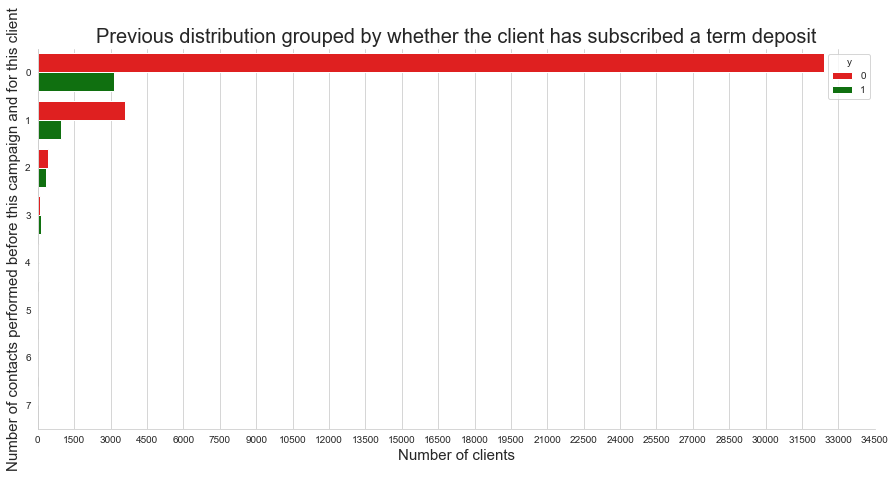

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
sns.countplot(y = 'previous', hue = 'y', data=data, palette = ['red', 'green'])
ax.set_title('Previous distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Number of contacts performed before this campaign and for this client', fontsize = 15)
ax.set_xticks(np.arange(0, 35000, step = 1500))
sns.despine()

##### Variable: poutcome (categorical):

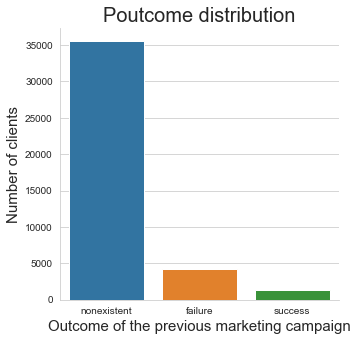

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.countplot(x = 'poutcome', data = data)
ax.set_title('Poutcome distribution', fontsize = 20)
ax.set_xlabel('Outcome of the previous marketing campaign', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
sns.despine()

In [55]:
data.pivot_table(values = 'y', index = 'poutcome',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,poutcome,failure,nonexistent,success
sum,y,605.000000,3141.000000,894.000000
count,y,4252.000000,35563.000000,1373.000000
mean,y,0.142286,0.088322,0.651129


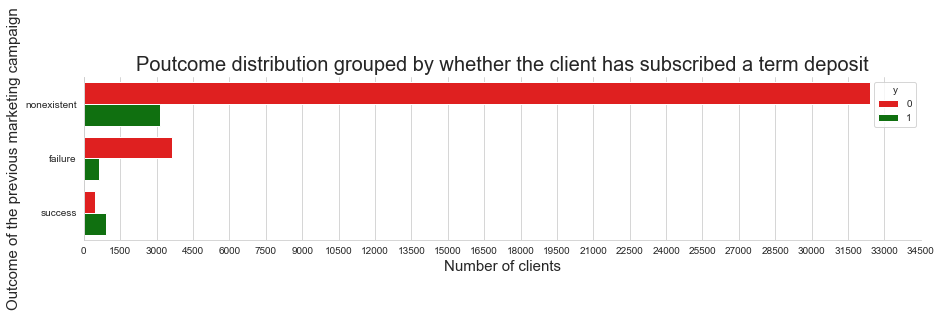

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 3)
sns.countplot(y = 'poutcome', hue = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Poutcome distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Outcome of the previous marketing campaign', fontsize = 15)
ax.set_xticks(np.arange(0, 35000, step = 1500))
sns.despine()

##### Variable: emp.var.rate (numeric):

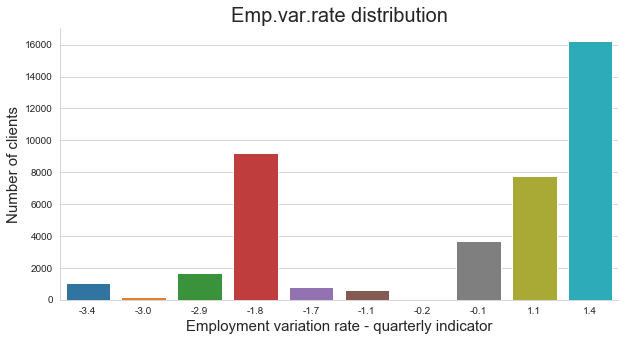

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'emp.var.rate', data = data)
ax.set_title('Emp.var.rate distribution', fontsize = 20)
ax.set_xlabel('Employment variation rate - quarterly indicator', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
sns.despine()

In [58]:
data.pivot_table(values = 'y', index = 'emp.var.rate',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,emp.var.rate,-3.4,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4
sum,y,454.000000,88.000000,594.000000,1461.000000,403.000000,301.000000,1.000000,232.000000,240.000000,866.000000
count,y,1071.000000,172.000000,1663.000000,9184.000000,773.000000,635.000000,10.000000,3683.000000,7763.000000,16234.000000
mean,y,0.423903,0.511628,0.357186,0.159081,0.521345,0.474016,0.100000,0.062992,0.030916,0.053345


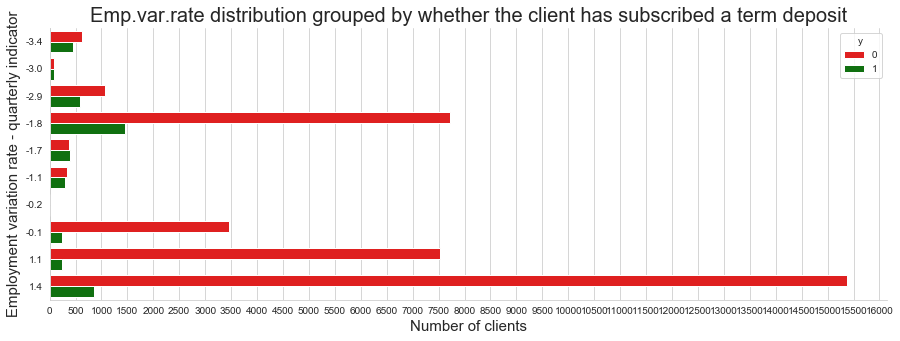

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(y = 'emp.var.rate', hue = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Emp.var.rate distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Employment variation rate - quarterly indicator', fontsize = 15)
ax.set_xticks(np.arange(0, 16500, step=500))
sns.despine()

##### Variable: cons.price.idx (numeric):

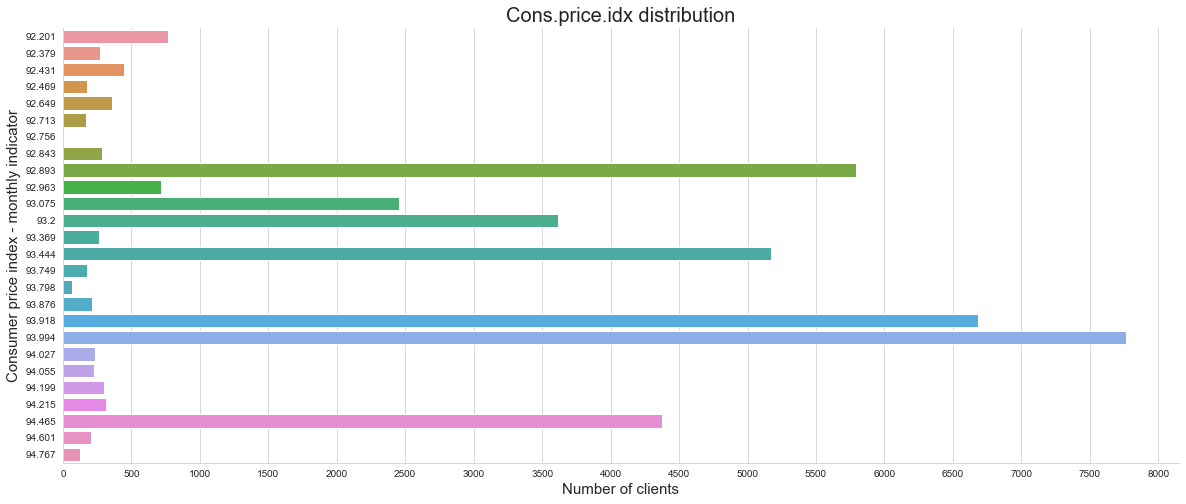

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(y = round(data['cons.price.idx'],3), data = data)
ax.set_title('Cons.price.idx distribution', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Consumer price index - monthly indicator', fontsize = 15)
ax.set_xticks(np.arange(0, 8500, step=500))
sns.despine()

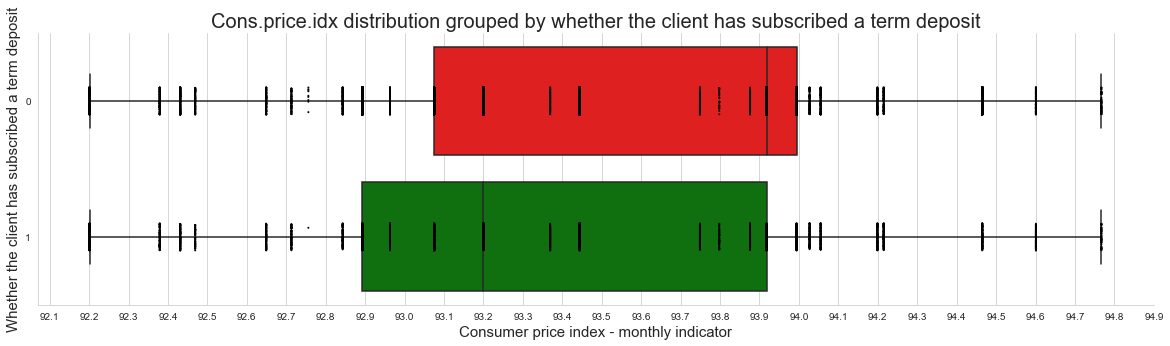

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.boxplot(y = 'y', x = 'cons.price.idx', data = data, palette = ['red', 'green'], orient = 'h', fliersize = 0),
sns.stripplot(y = 'y', x = 'cons.price.idx', data = data, palette = ['black', 'black'], orient = 'h', size = 2)
ax.set_title('Cons.price.idx distribution grouped by whether the client has subscribed a term deposit',fontsize = 20)
ax.set_xlabel('Consumer price index - monthly indicator', fontsize = 15)
ax.set_ylabel('Whether the client has subscribed a term deposit', fontsize = 15)
ax.set_xticks(np.arange(92.1, 94.9, step = 0.1))
ax.set_yticks( np.arange(2), ['0', '1'])
sns.despine()

In [62]:
data.pivot_table(values = 'y', index = 'cons.price.idx',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,cons.price.idx,92.20100000000001,92.37899999999999,92.431,92.469,92.649,92.713,92.756,92.84299999999999,92.89299999999999,92.963,93.075,93.2,93.369,93.444,93.749,93.79799999999999,93.876,93.91799999999999,93.994,94.027,94.055,94.199,94.215,94.465,94.601,94.76700000000001
sum,y,264.000000,106.000000,180.000000,66.000000,168.000000,88.000000,1.000000,126.000000,524.000000,264.000000,442.000000,190.000000,150.000000,271.000000,97.000000,42.000000,122.000000,407.000000,240.000000,120.000000,107.000000,150.000000,176.000000,188.000000,93.000000,58.000000
count,y,770.000000,267.000000,447.000000,178.000000,357.000000,172.000000,10.000000,282.000000,5794.000000,715.000000,2458.000000,3616.000000,264.000000,5175.000000,174.000000,67.000000,212.000000,6685.000000,7763.000000,233.000000,229.000000,303.000000,311.000000,4374.000000,204.000000,128.000000
mean,y,0.342857,0.397004,0.402685,0.370787,0.470588,0.511628,0.100000,0.446809,0.090438,0.369231,0.179821,0.052544,0.568182,0.052367,0.557471,0.626866,0.575472,0.060883,0.030916,0.515021,0.467249,0.495050,0.565916,0.042981,0.455882,0.453125


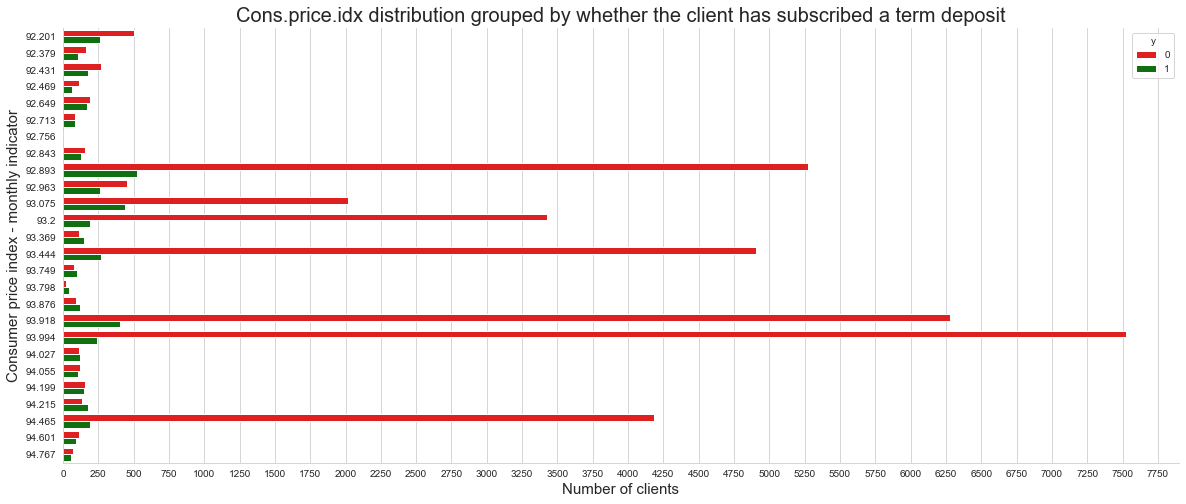

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(y = round(data['cons.price.idx'],3), hue = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Cons.price.idx distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Consumer price index - monthly indicator', fontsize = 15)
ax.set_xticks(np.arange(0, 8000, step = 250))
sns.despine()

##### Variable: cons.conf.id (numeric):

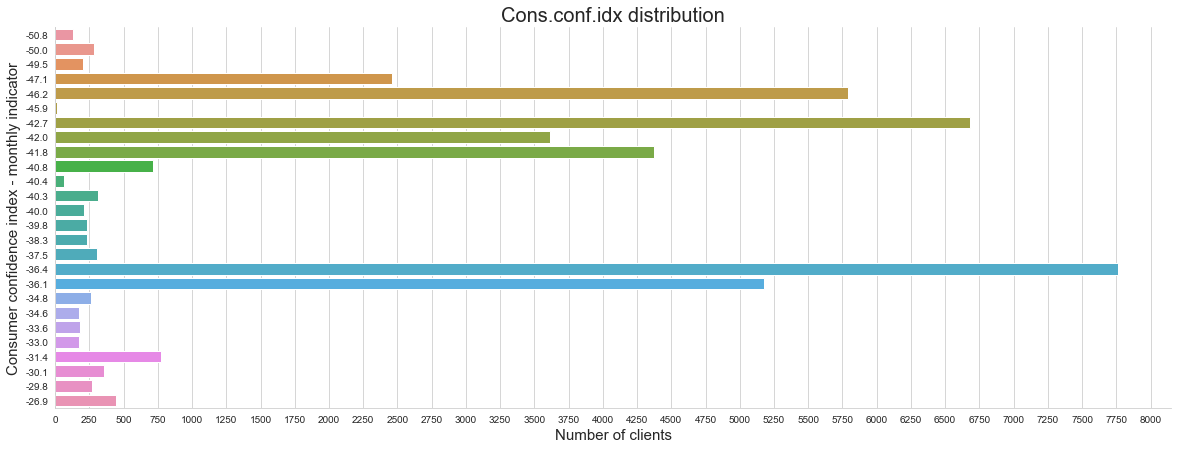

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
sns.countplot(y = 'cons.conf.idx', data = data)
ax.set_title('Cons.conf.idx distribution', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Consumer confidence index - monthly indicator', fontsize = 15)
ax.set_xticks(np.arange(0, 8250, step = 250))
sns.despine()

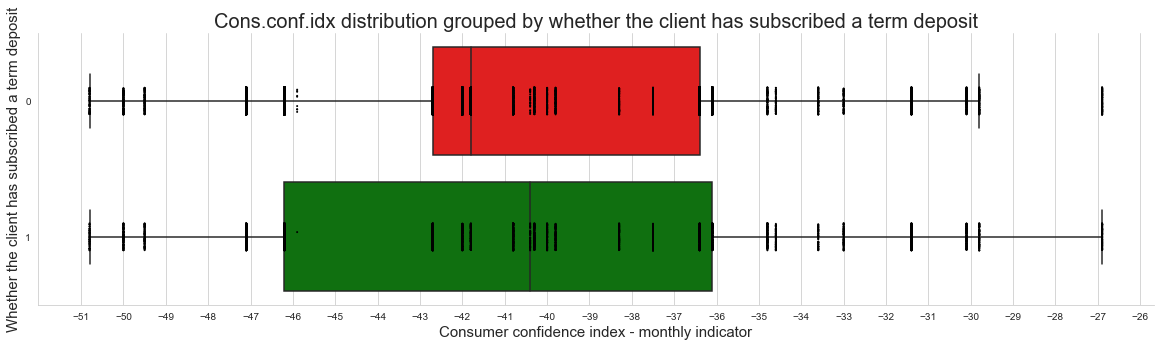

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.boxplot(y = 'y', x = 'cons.conf.idx', data = data, palette = ['red', 'green'], orient = 'h', fliersize = 0),
sns.stripplot(y = 'y', x = 'cons.conf.idx', data = data, palette = ['black', 'black'], orient = 'h', size = 2)
ax.set_title('Cons.conf.idx distribution grouped by whether the client has subscribed a term deposit',fontsize = 20)
ax.set_xlabel('Consumer confidence index - monthly indicator', fontsize = 15)
ax.set_ylabel('Whether the client has subscribed a term deposit', fontsize = 15)
ax.set_xticks(np.arange(-51, -25, step = 1))
ax.set_yticks( np.arange(2), ['0', '1'])
sns.despine()

In [66]:
data.pivot_table(values = 'y', index = 'cons.conf.idx',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,cons.conf.idx,-50.8,-50.0,-49.5,-47.1,-46.2,-45.9,-42.7,-42.0,-41.8,-40.8,-40.4,-40.3,-40.0,-39.8,-38.3,-37.5,-36.4,-36.1,-34.8,-34.6,-33.6,-33.0,-31.4,-30.1,-29.8,-26.9
sum,y,58.000000,126.000000,93.000000,442.000000,524.000000,1.000000,407.000000,190.000000,188.000000,264.000000,42.000000,176.000000,122.000000,107.000000,120.000000,150.000000,240.000000,271.000000,150.000000,97.000000,66.000000,88.000000,264.000000,168.000000,106.000000,180.000000
count,y,128.000000,282.000000,204.000000,2458.000000,5794.000000,10.000000,6685.000000,3616.000000,4374.000000,715.000000,67.000000,311.000000,212.000000,229.000000,233.000000,303.000000,7763.000000,5175.000000,264.000000,174.000000,178.000000,172.000000,770.000000,357.000000,267.000000,447.000000
mean,y,0.453125,0.446809,0.455882,0.179821,0.090438,0.100000,0.060883,0.052544,0.042981,0.369231,0.626866,0.565916,0.575472,0.467249,0.515021,0.495050,0.030916,0.052367,0.568182,0.557471,0.370787,0.511628,0.342857,0.470588,0.397004,0.402685


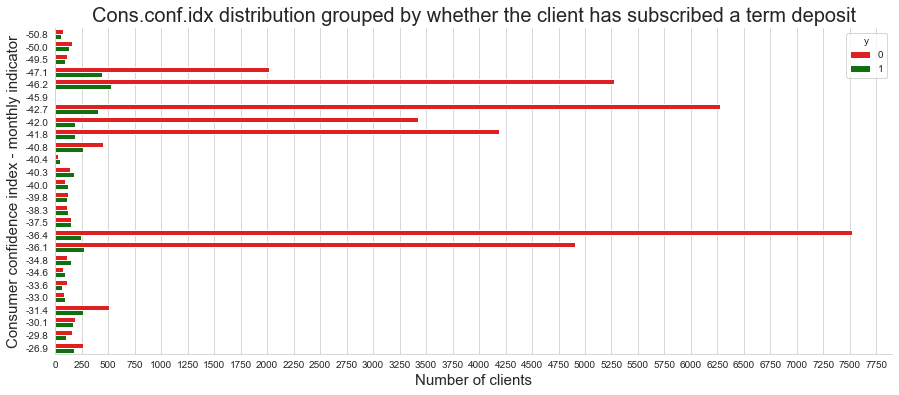

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
sns.countplot(y = round(data['cons.conf.idx'], 3), hue = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Cons.conf.idx distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Consumer confidence index - monthly indicator', fontsize = 15)
ax.set_xticks(np.arange(0, 8000, step = 250))
sns.despine()

##### Variable: euribor3m (numeric):

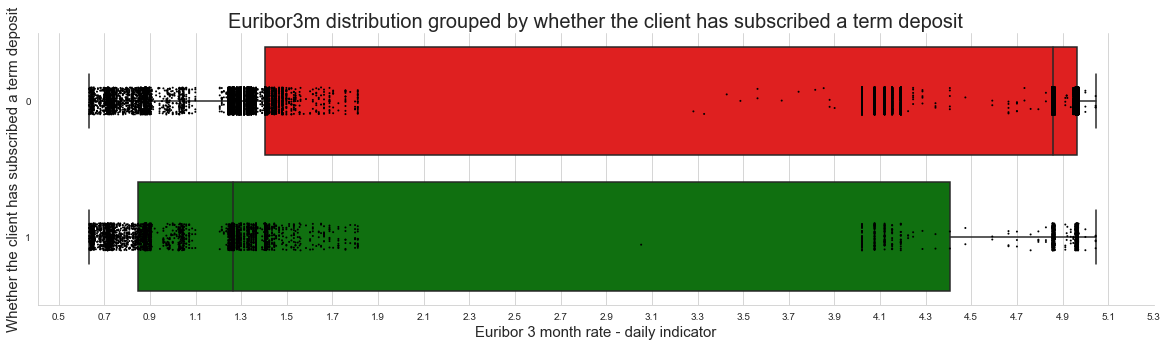

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.boxplot(y = 'y', x = 'euribor3m', data = data, palette = ['red', 'green'], orient = 'h', fliersize = 0),
sns.stripplot(y = 'y', x = 'euribor3m', data = data, palette = ['black', 'black'], orient = 'h', size = 2)
ax.set_title('Euribor3m distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Euribor 3 month rate - daily indicator', fontsize = 15)
ax.set_ylabel('Whether the client has subscribed a term deposit', fontsize = 15)
ax.set_xticks(np.arange(0.5, 5.5, step = 0.2))
sns.despine()

##### Variable: nr.employed (numeric):

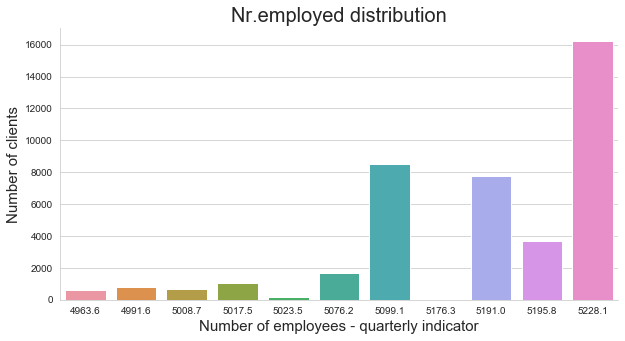

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'nr.employed', data = data)
ax.set_title('Nr.employed distribution', fontsize = 20)
ax.set_xlabel('Number of employees - quarterly indicator', fontsize = 15)
ax.set_ylabel('Number of clients', fontsize = 15)
sns.despine()

In [70]:
data.pivot_table(values = 'y', index = 'nr.employed',
                 aggfunc = ['sum', 'count', 'mean']).transpose().style.background_gradient(cmap = 'summer_r', axis = 1)

,nr.employed,4963.6,4991.6,5008.7,5017.5,5023.5,5076.2,5099.1,5176.3,5191.0,5195.8,5228.1
sum,y,301.000000,403.000000,369.000000,454.000000,88.000000,594.000000,1092.000000,1.000000,240.000000,232.000000,866.000000
count,y,635.000000,773.000000,650.000000,1071.000000,172.000000,1663.000000,8534.000000,10.000000,7763.000000,3683.000000,16234.000000
mean,y,0.474016,0.521345,0.567692,0.423903,0.511628,0.357186,0.127959,0.100000,0.030916,0.062992,0.053345


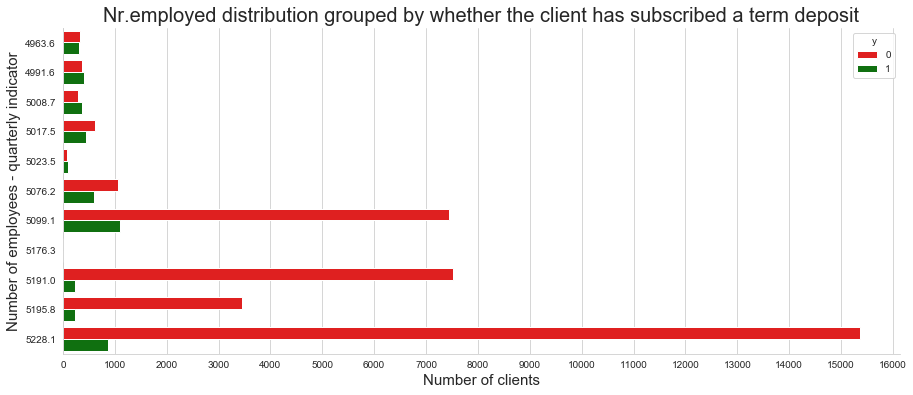

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
sns.countplot(y = round(data['nr.employed'], 3), hue = 'y', data = data, palette = ['red', 'green'])
ax.set_title('Nr.employed distribution grouped by whether the client has subscribed a term deposit', fontsize = 20)
ax.set_xlabel('Number of clients', fontsize = 15)
ax.set_ylabel('Number of employees - quarterly indicator', fontsize = 15)
ax.set_xticks(np.arange(0, 17000, step = 1000))
sns.despine()

### Check the correlation between the features:

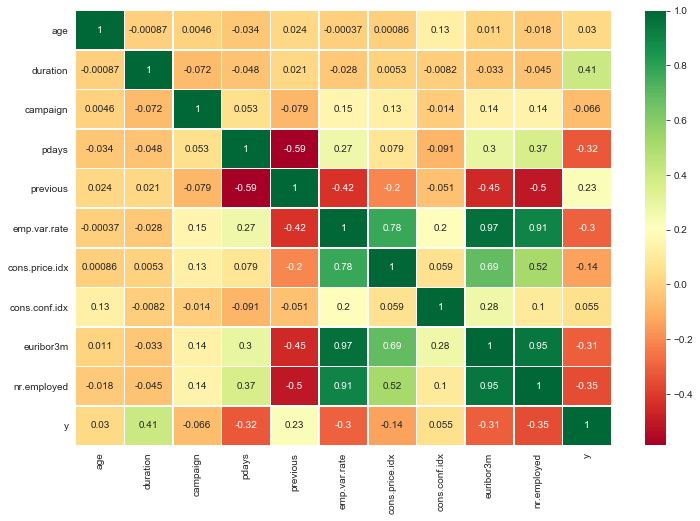

In [72]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.5)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()